# CS2545 Mini-Project

**Title:** How Geographic Location and Lifestyle Factors Correlate with Health Outcomes in Canada

**Student Name:** Pierre Jaurel Ekotto Mebande 

**Student Number:** 3725759

**Course:** CS2545


# 1. Introduction

Health outcomes vary significantly across Canadian provinces and territories, manifesting in differences in life expectancy, self-reported health status, obesity rates, and mortality patterns. This variation represents a critical public health challenge that requires comprehensive analysis to understand underlying determinants.

The purpose of this project is to examine how geographic location and lifestyle factors—particularly body mass index (BMI), physical activity levels, and related health behaviors—correlate with health outcomes across Canadian regions. By analyzing multiple health datasets from Statistics Canada, we aim to identify patterns and relationships that can inform evidence-based public health policy and intervention strategies.

# 2. Related Work
The Canadian Government has recognized that various health determinants shape the general wellness of all citizens. According to the Public Health Agency of Canada, health factors affect Canadians because both genetic and biological elements, and lifestyle and socio-economic status and geographic areas play roles in health outcomes [Government of Canada, 2022].

Other variables such as income, social status, education, environment quality, health practices and access to healthcare services create health outcome disparities between Canadian regions. This study uses existing knowledge about lifestyle indicators to analyze how smoking rates, physical activity behaviour, and BMI levels affect life expectancy and personal health assessment results in Canadian geographical areas.

# 3. Problem Statement and Requirements
### 3.1 Problem Statement
Public health planners and researchers encounter a fundamental challenge to understand why Canadian provinces perform differently in terms of their health outcomes. It is a real challenge to analyze disparities because of inconsistent measurement and lack of understanding.

When factors including physical activity, smoking and body mass index remain obscure to regional health trend analysis, then creating effective intervention programs and strategic health resource management becomes complex. The absence of insight creates obstacles that prevent Canadian health organizations from eliminating health disparities and raising healthcare standards for all Canadian residents.

Our aim is to assess the relationship between lifestyle and local health patterns. Analyzing open data will produce useful findings for implementing equitable health policies across Canada.

### 3.2 Requirements
- All datasets in this project need to derive from publicly accessible sources
- Include geographic visualization with proper labelling
- Include statistical analysis and charts
- Implement with Jupyter Notebook using Python



# 4. Approach
This project uses a quantitative approach. We use data from Statistics Canada and the Canada Open Government Portal. Our datasets include life expectancy by province, body mass index and obesity by region, and a survey on perceived health and mortality statistics by condition and location.

All datasets are in CSV format and cleaned using Pandas to ensure naming conventions throughout the data sources. We merge appropriate datasets to analyze the relationships. We identify patterns through descriptive statistics, correlation analysis and visual analysis. We use Matplotlib and Seaborn to connect data.

This approach clearly examines health disparities in Canada. The analysis includes datasets from various years, but we try to match them chronologically and discuss limitations in the final sections.  

# 5. Analysis

## 5.1 Load Libraries

Import Python libraries required for the analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 5.2 Load Datasets

Load CSV datasets into clearly labeled DataFrames using Pandas:

In [ ]:
bmi = pd.read_csv('data/BMI.csv') # BMI and Obesity by province
deaths_by_cause = pd.read_csv('data/Death_By_Cause.csv') # Deaths by cause of death
life_expectancy = pd.read_csv('data/Life_Expectancy_Canada_2000_to_2007.csv') # Life expectancy by province
perceived_health = pd.read_csv('data/Perceived_Health_Canada_2015.csv') # Perceived health by province

C:\Users\jaure\AppData\Local\Temp\ipykernel_19352\2894662036.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  deaths_by_cause = pd.read_csv('Death_by_Cause.csv') # Deaths by cause of death


## 5.3 Data Cleaning and Exploratory Analysis

### 5.3.1 Body Mass Index and Obesity Analysis

This analysis focuses on obesity rates across Canadian provinces, filtering for data where both sexes are represented and percentage values are used. We examine three BMI categories: Normal weight, Overweight, and Obese populations with provincial and yearly breakdowns.

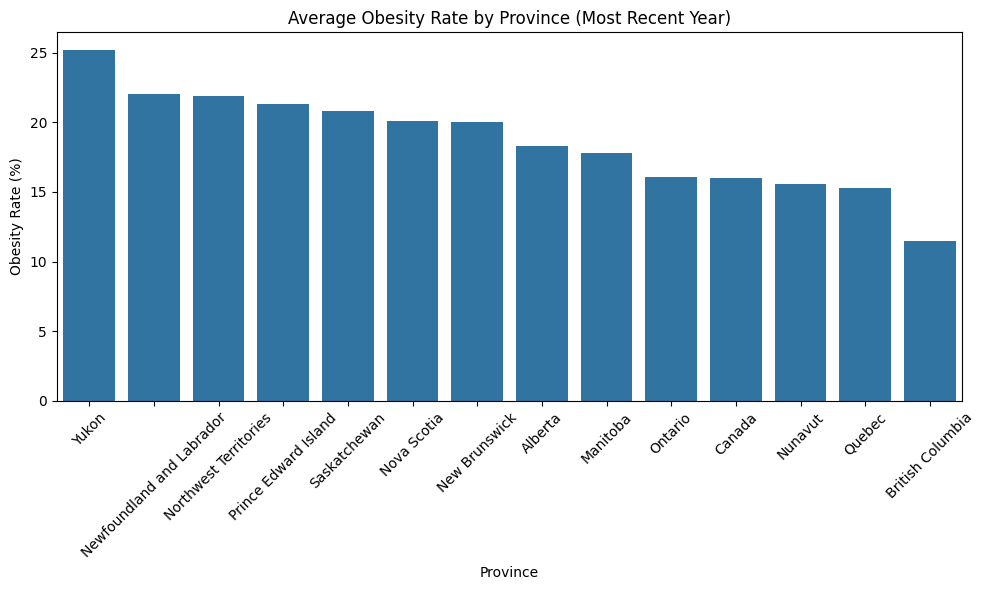

<Figure size 640x480 with 0 Axes>

In [ ]:
# Clean the column names for better usability
bmi.columns = bmi.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
# Filter bmi for relevant data
bmi_filtered = bmi[
    (bmi["Sex"] == "Both sexes") &
    (bmi["Characteristics"] == "Percent") &
    (bmi["Body_mass_index_BMI"].isin([
        "Normal weight, body mass index 18.50 to 24.99",
        "Overweight, body mass index 25.00 to 29.99",
        "Obese, body mass index 30.00 or higher"
    ]))
]
# Rename columns for clarity
bmi_filtered = bmi_filtered.rename(columns={
    "REF_DATE": "Year",
    "GEO": "Province",
    "Body_mass_index_BMI": "BMI_Category",
    "VALUE": "Percentage"
})
# Most recent year
bmi_filtered = bmi_filtered[bmi_filtered["Year"] == bmi_filtered["Year"].max()]
# Save the cleaned data
bmi_filtered.to_csv('data/cleaned_bmi_data.csv', index=False)
# Average obesity rate by province
bmi_obese = bmi_filtered[bmi_filtered["BMI_Category"] == "Obese, body mass index 30.00 or higher"]
avg_obese = bmi_obese.groupby("Province")["Percentage"].mean().sort_values(ascending=False).reset_index()
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_obese["Province"], y=avg_obese["Percentage"])
plt.title('Average Obesity Rate by Province (Most Recent Year)')
plt.xlabel('Province')
plt.ylabel('Obesity Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Save the plot
plt.savefig('visualizations/average_obesity_rate_by_province.png')

**Key Findings:**
Yukon demonstrates the highest obesity rate among Canadian provinces and territories, with obesity affecting over 25% of its population. Newfoundland and Labrador and Northwest Territories follow closely behind with rates exceeding 22%. In contrast, British Columbia shows the lowest obesity rate at approximately 12%, representing the best provincial performance in this health indicator.

### 5.3.2 Mortality by Cause Analysis

This dataset presents age-specific mortality rates per 100,000 population for both sexes across provincial divisions. We focus on five major fatal conditions that are significantly influenced by lifestyle factors: cancer (malignant neoplasms), heart disease, cerebrovascular diseases, chronic respiratory diseases, and diabetes.

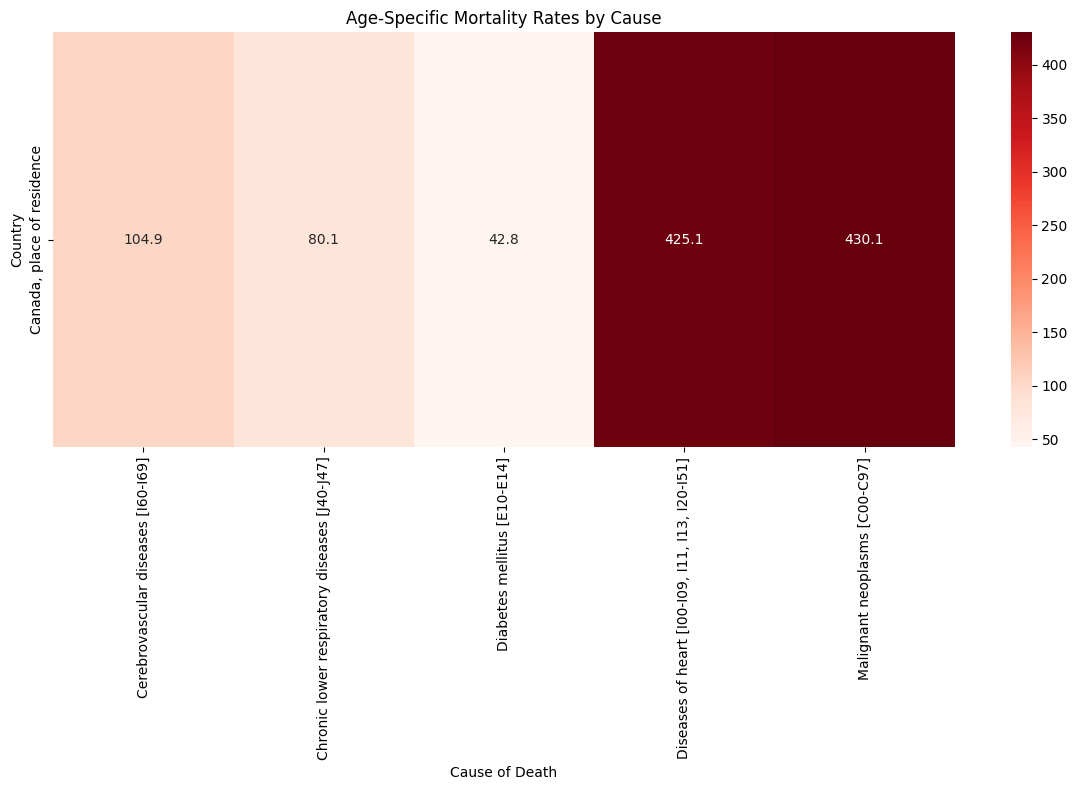

<Figure size 640x480 with 0 Axes>

In [ ]:
# Clean column names
deaths_by_cause.columns = deaths_by_cause.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
# Filter by both sexes and mortality rate
deaths_by_cause_filtered = deaths_by_cause[
    (deaths_by_cause["Sex"] == "Both sexes") &
    (deaths_by_cause["Characteristics"] == "Age-specific mortality rate per 100,000 population")
]
# Filter for selected causes
selected_causes = [
    "Malignant neoplasms [C00-C97]",
    "Diseases of heart [I00-I09, I11, I13, I20-I51]",
    "Cerebrovascular diseases [I60-I69]", 
    "Chronic lower respiratory diseases [J40-J47]",
    "Diabetes mellitus [E10-E14]"
]
deaths_by_cause_filtered = deaths_by_cause_filtered[
    deaths_by_cause_filtered["Leading_causes_of_death_ICD-10"].isin(selected_causes) 
]
# Rename for clarity
deaths_by_cause_filtered = deaths_by_cause_filtered.rename(columns={
    "REF_DATE": "Year",
    "GEO": "Country",
    "Leading_causes_of_death_ICD-10": "Cause_of_Death",
    "VALUE": "Mortality_Rate"
})[["Year", "Country", "Cause_of_Death", "Mortality_Rate"]]
# Pivot to wide format
deaths_by_cause_clean = deaths_by_cause_filtered.pivot_table(
    index=["Country", "Year"],
    columns="Cause_of_Death",
    values="Mortality_Rate",
).reset_index()
# Get most recent year per province
latest_deaths = deaths_by_cause_clean.sort_values("Year").drop_duplicates("Country", keep="last").set_index("Country")
# Drop the Year column
latest_deaths = latest_deaths.drop(columns=["Year"])
# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(latest_deaths, annot=True, cmap="Reds", fmt=".1f")
plt.title("Age-Specific Mortality Rates by Cause")
plt.xlabel("Cause of Death")
plt.ylabel("Country")
plt.tight_layout()
plt.show()
# Save the plot
plt.savefig('visualizations/mortality_rates_heatmap.png')

**Key Findings:**
The mortality heatmap reveals that malignant neoplasms (cancer) and diseases of the heart are the leading causes of death in Canada, with age-specific mortality rates of 430.1 and 425.1 per 100,000 population respectively. These two conditions account for the vast majority of deaths and are strongly associated with modifiable lifestyle factors including obesity, smoking, and physical inactivity. Other significant causes include cerebrovascular diseases, chronic respiratory diseases, and diabetes, though at considerably lower rates.

### 5.3.3 Life Expectancy Analysis

This analysis focuses on life expectancy at birth for both sexes across all Canadian provinces and territories. We examine the most recent data available to identify current provincial variations in longevity.

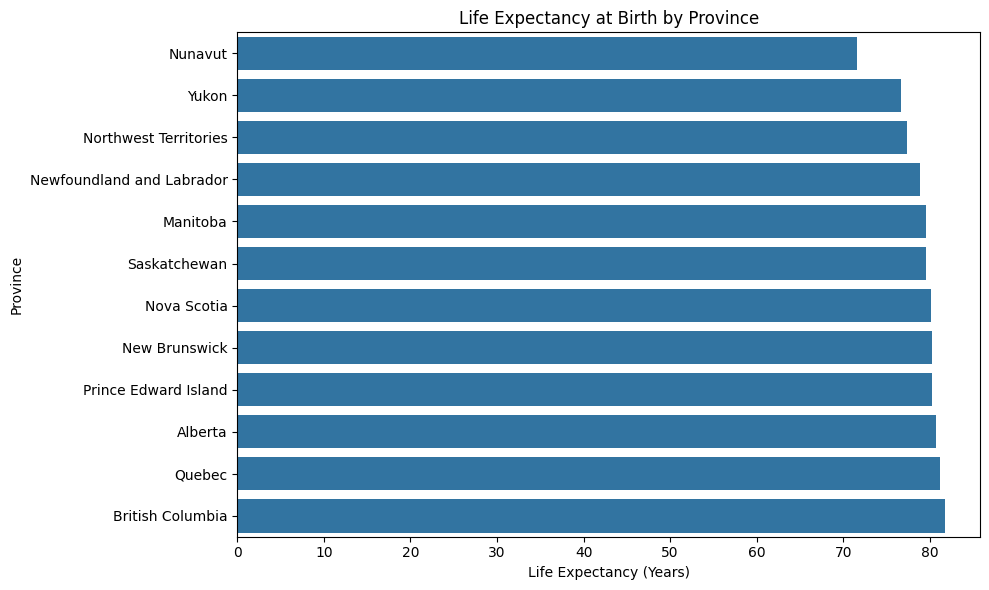

<Figure size 640x480 with 0 Axes>

In [ ]:
# Clean column names
life_expectancy.columns = life_expectancy.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
# Filter for at birth, both sexes, and life expectancy values
life_expectancy_filtered = life_expectancy[
    (life_expectancy["Age_group"] == "At birth") &
    (life_expectancy["Sex"] == "Both sexes") &
    (life_expectancy["Characteristics"] == "Life expectancy") &
    (life_expectancy["GEO"] != "Canada")
]
# Define list of valid Canadian provinces and territories
canadian_provinces = [
    "British Columbia", "Alberta", "Saskatchewan", "Manitoba", "Ontario", "Quebec",
    "New Brunswick", "Nova Scotia", "Prince Edward Island", "Newfoundland and Labrador",
    "Yukon", "Northwest Territories", "Nunavut"
]
# Keep only actual provinces (exclude health regions)
life_expectancy_provinces = life_expectancy_filtered[life_expectancy_filtered["GEO"].isin(canadian_provinces)]
# Keep latest entry per province
latest_life_expectancy = life_expectancy_provinces.sort_values("REF_DATE").drop_duplicates("GEO", keep="last")
# Rename columns
latest_life_expectancy = latest_life_expectancy.rename(columns={
    "REF_DATE": "Year",
    "GEO": "Province",
    "VALUE": "Life_Expectancy"
})[["Year", "Province", "Life_Expectancy"]]
# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=latest_life_expectancy.sort_values("Life_Expectancy"), 
            x="Life_Expectancy", y="Province")
plt.title("Life Expectancy at Birth by Province")
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Province")
plt.tight_layout()
plt.show()
# Save the plot
plt.savefig('visualizations/life_expectancy_by_province.png')

**Key Findings:**
British Columbia demonstrates the highest life expectancy among Canadian provinces at approximately 81 years, followed closely by Ontario and Quebec. The northern territories (Nunavut, Northwest Territories, and Yukon) show the lowest life expectancy rates, with Nunavut at approximately 71 years - a 10-year gap that highlights significant geographic health disparities across Canada.

### 5.3.4 Perceived Health Analysis

This section examines the percentage of individuals who rate their health status as "very good or excellent" across provinces, providing insight into subjective health assessments that can be compared with objective health measures.

C:\Users\jaure\AppData\Local\Temp\ipykernel_19352\4131729754.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=latest_perceived_health.sort_values("Percentage"), x="Percentage", y="Province", palette="Greens")


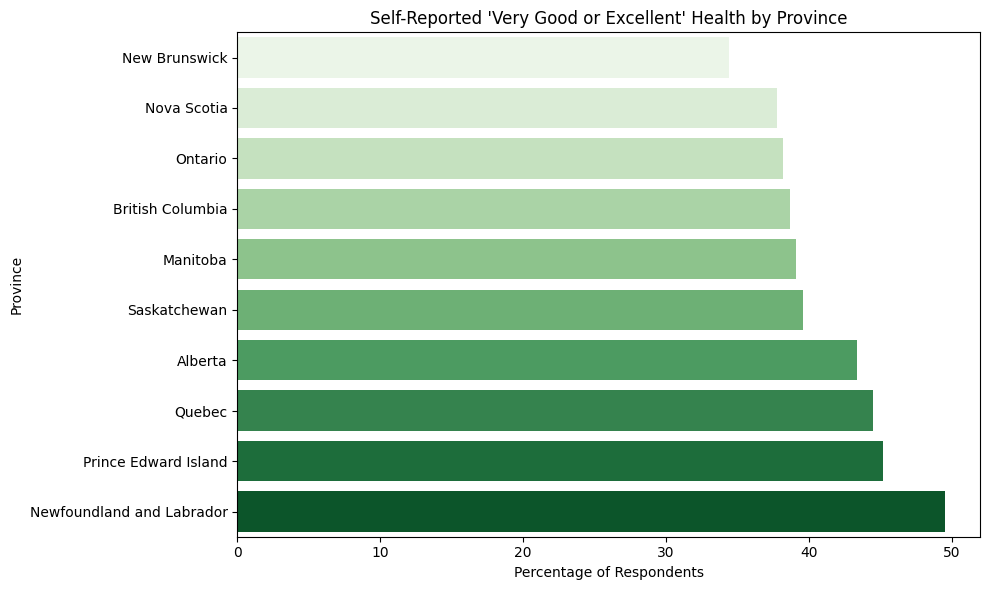

<Figure size 640x480 with 0 Axes>

In [ ]:
# Clean the column names for better usability
perceived_health.columns = perceived_health.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
# Filter for oth sexes and precent format
perceived_health_filtered = perceived_health[
    (perceived_health["Sex"] == "Both sexes") &
    (perceived_health["Characteristics"] == "Percent") &
    (perceived_health["Indicators"] == "Perceived health, very good or excellent")
]
# Exclude Canada as a whole
perceived_health_filtered = perceived_health_filtered[perceived_health_filtered["GEO"] != "Canada (excluding territories)"]
# Rename columns for clarity
perceived_health_filtered = perceived_health_filtered.rename(columns={
    "REF_DATE": "Year",
    "GEO": "Province",
    "VALUE": "Percentage"
})
# Keep only the most recent year per province
latest_perceived_health = perceived_health_filtered.sort_values("Year").drop_duplicates("Province", keep="last")
# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=latest_perceived_health.sort_values("Percentage"), x="Percentage", y="Province", palette="Greens")
plt.title("Self-Reported 'Very Good or Excellent' Health by Province")
plt.xlabel("Percentage of Respondents")
plt.ylabel("Province")
plt.tight_layout()
plt.show()
# Save the plot
plt.savefig('visualizations/perceived_health_by_province.png')

**Key Findings:**
Newfoundland and Labrador shows the highest percentage of residents reporting "very good or excellent" health at approximately 48%, followed by Prince Edward Island and Quebec. In contrast, New Brunswick demonstrates the lowest self-reported health perception at around 35%. Interestingly, this perceived health ranking does not directly correlate with objective health measures like life expectancy, suggesting a disconnect between subjective health assessment and actual health outcomes.

## 5.4 Correlation Analysis and Insights

This section investigates the relationships between key health indicators: obesity rates, perceived health, and life expectancy across Canadian provinces. By merging our cleaned datasets and calculating Pearson correlation coefficients, we can quantify the strength of associations between these fundamental health variables.

**Variables Analyzed:**
- Life Expectancy (years at birth)
- Obesity Rate (percentage of population with BMI ≥30)
- Perceived Health (percentage reporting "very good or excellent" health)

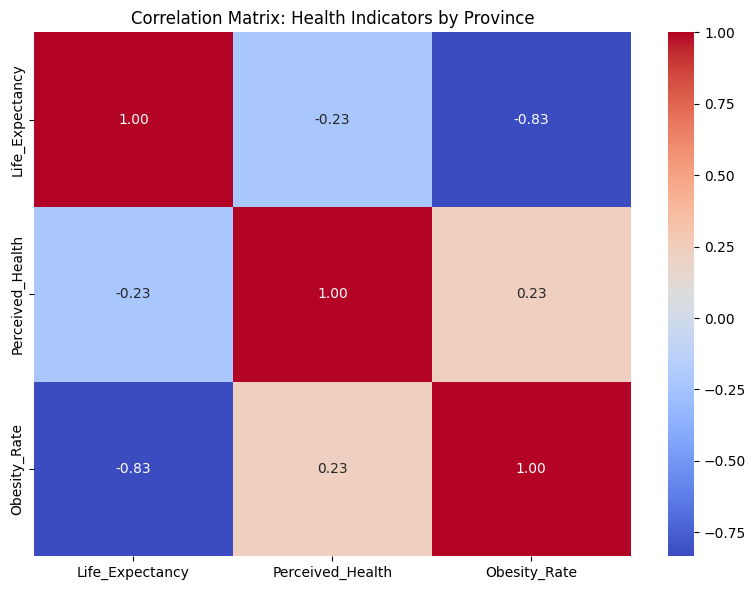

<Figure size 640x480 with 0 Axes>

In [ ]:
# Rename avg_obese column for clarity
avg_obese = avg_obese.rename(columns={"Percentage": "Obesity_Rate"})

# Merge datasets on Province
merged = latest_life_expectancy.merge(
    latest_perceived_health[["Province", "Percentage"]].rename(columns={"Percentage": "Perceived_Health"}),
    on="Province"
).merge(
    avg_obese,
    on="Province"
)
# Correlation matrix
correlation_matrix = merged[["Life_Expectancy", "Perceived_Health", "Obesity_Rate"]].corr()
# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Health Indicators by Province")
plt.tight_layout()
plt.show()
# Save the plot
plt.savefig('visualizations/correlation_matrix_health_indicators.png')

## Key Findings from Correlation Analysis:

This analysis reveals several important relationships between health indicators across Canadian provinces:

**Strong Negative Correlation**: Life expectancy and obesity rates show a robust inverse relationship (r = -0.83), indicating that provinces with higher obesity rates tend to have significantly lower life expectancy.

**Weak Correlations**: 
- Self-reported health perception shows only a weak negative correlation with life expectancy (r = -0.23), suggesting that subjective health assessments may not accurately reflect actual longevity outcomes
- Perceived health and obesity rates demonstrate a weak positive correlation (r = 0.23), indicating minimal association between self-reported health status and obesity levels

**Provincial Patterns**: The data reveals clear geographic health disparities, with western provinces generally showing better health outcomes compared to eastern regions.

# 6. Conclusion and Discussion

This comprehensive analysis examined the relationships between geographic location and lifestyle factors affecting health outcomes across Canadian provinces, utilizing multiple open data sources including BMI statistics, life expectancy data, mortality records, and perceived health assessments.

## Major Findings

**1. Obesity as a Critical Health Determinant**
Our analysis revealed obesity rates as the strongest predictor of life expectancy (r = -0.83), establishing it as the most significant modifiable health factor in this study. This strong negative correlation suggests that provincial obesity prevention programs could substantially impact population longevity.

**2. Geographic Health Disparities**
Clear provincial variations emerged in our analysis:
- **Western Provinces**: British Columbia demonstrated the optimal health profile with low obesity rates (~12%) and highest life expectancy (~81 years)
- **Eastern Provinces**: Maritime provinces showed elevated obesity rates and reduced life expectancy, indicating regional health challenges
- **Northern Territories**: Nunavut exhibited the lowest life expectancy (~71 years), highlighting healthcare access disparities

**3. Perception vs. Reality Gap**
The weak correlation between perceived health and life expectancy (r = -0.23) reveals a concerning disconnect between subjective health assessments and objective health outcomes. This suggests that self-reported health measures may inadequately capture actual health risks.

**4. Leading Mortality Patterns**
Cancer (malignant neoplasms) and cardiovascular disease emerged as primary causes of death, with mortality rates strongly linked to lifestyle factors, particularly obesity.

## Public Health Implications

These findings support targeted interventions focusing on:
- Provincial obesity reduction programs, especially in high-risk regions
- Improved health education to align health perceptions with reality
- Resource allocation addressing geographic health disparities
- Lifestyle modification programs targeting cardiovascular and cancer risk factors

## Study Limitations

Several constraints limit our analysis:
- **Temporal Inconsistencies**: Datasets span different time periods, potentially affecting correlation accuracy
- **Limited Granularity**: Provincial-level analysis may mask important sub-regional variations
- **Missing Variables**: Smoking rates, socioeconomic status, healthcare accessibility, and environmental factors were not included
- **Causality**: Correlational analysis cannot establish causal relationships

## Future Research Directions

Enhanced analysis should incorporate:
- Longitudinal data to establish temporal relationships
- Additional lifestyle factors (smoking, physical activity, diet quality)
- Socioeconomic determinants and healthcare accessibility metrics
- Sub-provincial analysis for more targeted interventions
- Environmental and social determinants of health

## Final Conclusion

This analysis demonstrates that modifiable lifestyle factors, particularly obesity, significantly influence population health outcomes across Canadian provinces. The strong relationship between obesity and life expectancy (r = -0.83) provides compelling evidence for prioritizing obesity prevention in public health strategies. 

Geographic health disparities revealed in this study warrant targeted interventions and resource allocation to address regional health challenges. The disconnect between perceived and actual health outcomes highlights the need for improved health literacy and objective health monitoring.

These findings can inform evidence-based public health policy development, resource allocation decisions, and targeted intervention strategies to improve health outcomes across all Canadian provinces.

# References

- Statistics Canada. *Life expectancy and death statistics*. Retrieved from https://www.statcan.gc.ca/en/subjects-start/health/life_expectancy_and_deaths

- Government of Canada. (2022). What makes Canadians healthy or unhealthy? Public Health Agency of Canada. https://www.canada.ca/en/public-health/services/health-promotion/population-health/what-determines-health/what-makes-canadians-healthy-unhealthy.html

- Statistics Canada. *Body mass index and health*. Retrieved from https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310009601

- Statistics Canada. *Perceived health, by province and sex*. Retrieved from https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310009602

- Statistics Canada. *Leading causes of death, total population, by age group*. Retrieved from https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310039401

